In [3]:

from segment_anything import SamPredictor, SamAutomaticMaskGenerator, sam_model_registry
import torch
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
print(f"Using device: {device}")
sam = sam_model_registry["vit_h"](checkpoint="/Users/ammarh/j595/VLMs/sam_vit_h_4b8939.pth")
# sam = sam.float()
sam = sam.half()
sam.to(device=device)

predictor = SamPredictor(sam)
# predictor.set_image(<your_image>)
# masks, _, _ = predictor.predict(<input_prompts>)

Using device: mps


In [4]:
img_name = "/Users/ammarh/Desktop/IMG_0051.jpeg"
import cv2
import numpy as np
# Load an image
img = cv2.imread(img_name)#.astype(np.float16)
type(img[0][0][0])
# predictor.set_image(img)
# masks, _, _ = predictor.predict(<input_prompts>)

numpy.uint8

In [5]:
# masks, _, _ = predictor.predict("mark all the lamps")

mask_generator = SamAutomaticMaskGenerator(sam)
type(mask_generator)
masks = mask_generator.generate(img)

: 

: 

In [6]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([255/255, 200/255, 0/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [10]:
import supervision as sv

mask_annotator = sv.MaskAnnotator()
detections = sv.Detections.from_sam(masks)
annotated_image = mask_annotator.annotate(img, detections)

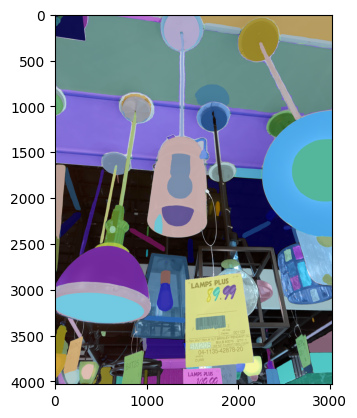

In [16]:
imgplot = plt.imshow(annotated_image)


In [28]:
len(masks[1]['segmentation'])



(4032, 3024, 3)